# Proceso estándar de clasificación

1. Separar datos de entrenamiento / prueba
2. Normalizar datos / Crear un normalizador
3. Crear modelo (NN)
4. Entrenar
5. Evaluar resultados

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [93]:
# asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

### Datos de entrenamiento / prueba

In [94]:
x_train = pd.read_csv('data_train.csv')
#seleciona  'Europe','Japan','USA' de la informacion
y_train = x_train[['Europe','Japan','USA']]
x_train = x_train.drop(['Europe','Japan','USA'], axis=1)

x_test = pd.read_csv('data_test.csv')
y_test = x_test[['Europe','Japan','USA']]
x_test = x_test.drop(['Europe','Japan','USA'], axis=1)


In [95]:
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [96]:
normalizador = crear_normalizador(x_train)


### Creación Red Neuronal

In [97]:
def crear_nn_regresion(norm):
    model = Sequential([
        norm,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.001))
    return model

In [98]:
nn = crear_nn_regresion(normalizador)

In [99]:
history = nn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=200
)

In [100]:
nn.evaluate(x_test, y_test, verbose=0)

0.1769852340221405

In [101]:
predict = nn.predict([4,121,112,2868,15.5,73,19]).flatten()
print(predict)


1/1 [==============================] - 0s 233ms/step
[9.9214119e-01 1.5927503e-01 1.0141929e-08]


In [102]:
print('Europa: ', predict[0])
print('Japon: ', predict[1])
print('USA: ', predict[2])



Europa:  0.9921412
Japon:  0.15927503
USA:  1.0141929e-08


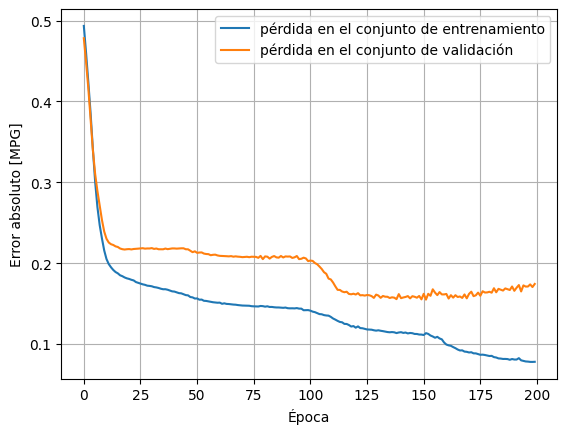

In [103]:
# Graficar la función de pérdida
plt.plot(history.history['loss'], label='pérdida en el conjunto de entrenamiento')
plt.plot(history.history['val_loss'], label='pérdida en el conjunto de validación')
plt.xlabel('Época')
plt.ylabel('Error absoluto [MPG]')
plt.legend()
plt.grid(True)
plt.show()